# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [94]:
import pandas as pd
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t', decimal=',')
#print(data.head())

In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   total_images          23699 non-null  int64 
 1   last_price            23699 non-null  object
 2   total_area            23699 non-null  object
 3   first_day_exposition  23699 non-null  object
 4   rooms                 23699 non-null  int64 
 5   ceiling_height        14504 non-null  object
 6   floors_total          23613 non-null  object
 7   living_area           21796 non-null  object
 8   floor                 23699 non-null  int64 
 9   is_apartment          2775 non-null   object
 10  studio                23699 non-null  bool  
 11  open_plan             23699 non-null  bool  
 12  kitchen_area          21421 non-null  object
 13  balcony               12180 non-null  object
 14  locality_name         23650 non-null  object
 15  airports_nearest      18157 non-null

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'floor'}>, <AxesSubplot:>]],
      dtype=object)

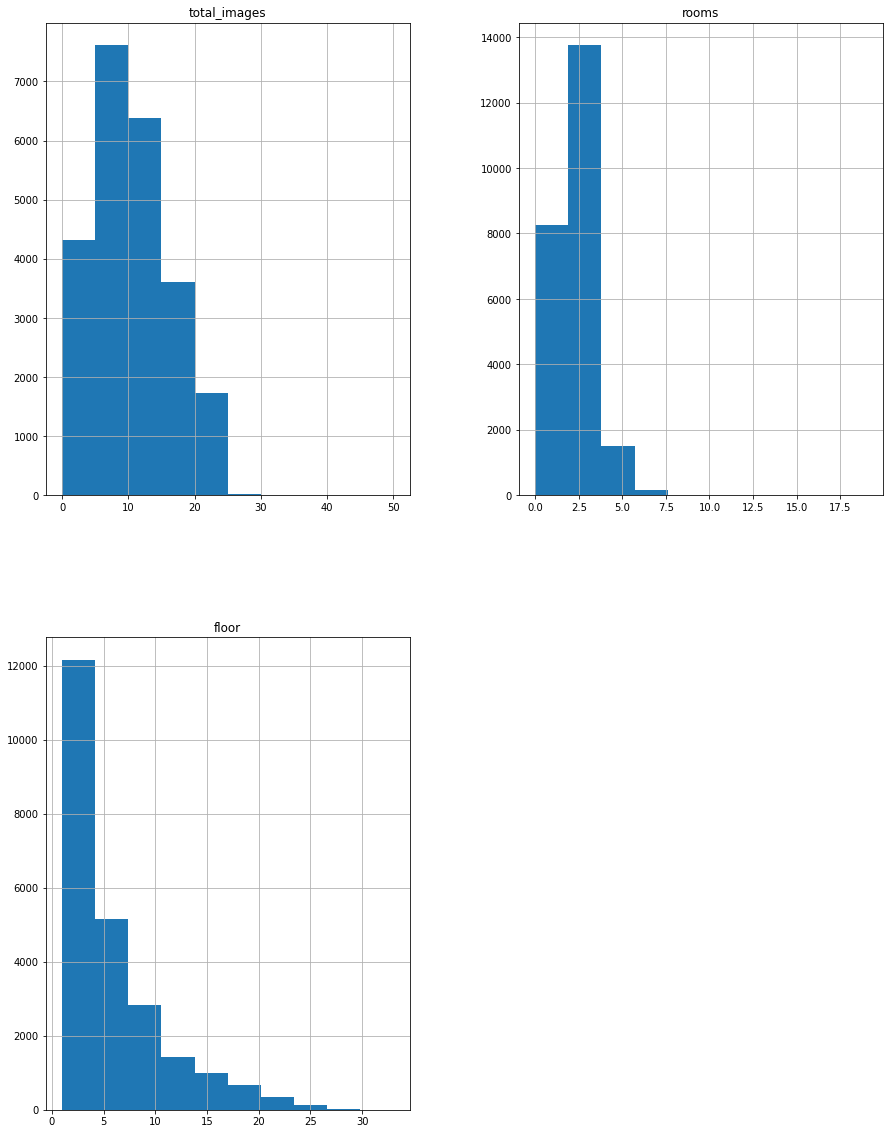

In [96]:
data.hist(figsize=(15,20))

<b>Вывод <br>
Большая часть данных не в правильном типе (object), далее будет необходимо подправить типы данных. <br>
Присудствует множество пропусков в части колонок, необходимо провести работу по устранению пропусков.<br>
Т.к данные не в обходимом типе выбросы и аномалии будут устранены во время предобработки данных.   <b>

### Предобработка данных

Преобразуем пропуски значений в столбцах

In [97]:
data.isna().sum() # проверяем на None & NaN

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [98]:
display(data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.7,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [99]:
# NaN в 0 - data['balcony']
data['balcony'] = data['balcony'].fillna(0) 
# "посёлок" в "поселок"
data['locality_name'] = data['locality_name'].str.replace("посёлок", "поселок") 
# почему так много НаН?
data['is_apartment'].unique()
# поменяем НаН на False 
data['is_apartment'] = data['is_apartment'].fillna(False)

# Что на счет parks_nearest  и ponds_nearest
# data['parks_nearest'].isna().sum()
# Не понятно с чем связано все это, поэтому ничего не будем трогать

In [100]:
#print(data[(data['rooms'] == 0)& (data['studio']==True)]) # Если комнат = 0, студия?
#flats_data = data.query('rooms == 0') #Сделаем разрез для удобства 
#flats_data['total_area'].unique() # 58.4 | 98.4 | 371 <- Это ошибки?
#print(flats_data[flats_data['total_area']=='371.0']) #371м ~ 71.000.000 судя по цене правда, но я не уверен
#print(flats_data[flats_data['total_area']=='98.4']) #98.4м ~ 16.300.000 скорее всего правда
#print(flats_data['kitchen_area'].unique()) # Все значение НаН
#print(flats_data['living_area'].unique()) # Имеет хотя бы какой-то место для жизни, следовательно есть 1 комната
#data['rooms'] = data[data['rooms']<1] == 1
data['rooms'] = data['rooms'].where(data['rooms']>1,1)

<b>
Нулевые значения могут сильно искозить картину данных, их трогать не будем
    <b>

In [102]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   total_images          23699 non-null  int64 
 1   last_price            23699 non-null  object
 2   total_area            23699 non-null  object
 3   first_day_exposition  23699 non-null  object
 4   rooms                 23699 non-null  int64 
 5   ceiling_height        14504 non-null  object
 6   floors_total          23613 non-null  object
 7   living_area           21796 non-null  object
 8   floor                 23699 non-null  int64 
 9   is_apartment          23699 non-null  bool  
 10  studio                23699 non-null  bool  
 11  open_plan             23699 non-null  bool  
 12  kitchen_area          21421 non-null  object
 13  balcony               23699 non-null  object
 14  locality_name         23650 non-null  object
 15  airports_nearest      18157 non-null

Преобразуем столбцы из object в необходимый формат (int,float,bool,datetime)

In [103]:
# object to int
for i in ['last_price','floors_total','balcony','airports_nearest','cityCenters_nearest','parks_around3000','parks_nearest','ponds_around3000','ponds_nearest','days_exposition']:
    data[i] = pd.to_numeric(data[i], downcast='signed')
# object to float
for i in ['total_area','ceiling_height','living_area','kitchen_area']:
    data[i] = pd.to_numeric(data[i], downcast='float')
# object to bool
data['is_apartment']=data['is_apartment'].astype('bool')
# object to datetime
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d %H:%M')

После преобразования можно заполнить пропуски в столбце ceiling_height

In [104]:
import warnings
warnings.filterwarnings("ignore")
data['ceiling_height'].loc[data['ceiling_height']>10] /= 10
print(data['ceiling_height'].unique())
# значения больше 10м скорее всего ошибочны, необходимо переставить знак 25.0 -> 2.50

[ 2.7    nan  3.03  2.5   2.67  2.56  3.05  2.75  2.6   2.9   2.8   2.55
  3.    2.65  3.2   2.61  3.25  3.45  2.77  2.85  2.64  2.57  4.15  3.5
  3.3   2.71  4.    2.47  2.73  2.84  3.1   2.34  3.4   3.06  2.72  2.54
  2.51  2.78  2.76  2.58  3.7   2.52  5.2   2.87  2.66  2.59  2.    2.45
  3.6   2.92  3.11  3.13  3.8   3.15  3.55  3.16  3.62  3.12  2.53  2.74
  2.96  2.46  5.3   5.    2.79  2.95  4.06  2.94  3.82  3.54  3.53  2.83
  4.7   2.4   3.38  3.01  5.6   3.65  3.9   3.18  3.35  2.3   3.57  2.48
  2.62  2.82  3.98  2.63  3.83  3.52  3.95  3.75  2.88  3.67  3.87  3.66
  3.85  3.86  4.19  3.24  4.8   4.5   4.2   3.36  3.08  3.68  3.07  3.37
  3.09  8.    3.26  3.34  2.81  3.44  2.97  3.14  4.37  2.68  3.22  3.27
  4.1   2.93  3.46  3.47  3.33  3.63  3.32  1.2   8.3   2.98  2.86  3.17
  4.4   3.28  3.04  4.45  5.5   3.84  3.23  3.02  3.21  3.43  3.78  4.3
  3.39  2.69  3.31  4.65  3.56  2.2   3.51  3.93  3.42  2.99  3.49  1.4
  4.14  2.91  3.88  1.75  4.25  3.29  2.25  3.76  3.69

In [105]:
#В прошлом блоке отредактивровали выбросы, теперь можем заполнить пропуски медианным значением
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

<b>
Выборка по пропущеным значениям мала, заполнение не сильно исказит данные.
    <b>

In [106]:
# Постараемся найти те пропуски в растоянии до парков при наличии парков и прудов в радиусе 3 км.
print(len(data[(data['parks_nearest'].isna())&(data['parks_around3000'] == 0)]))
print(len(data[(data['ponds_nearest'].isna())&(data['ponds_around3000'] == 0)]))
#Эти пропуски по сути можно не заменять, дополнительной информации они не принесут, /
#а лишь испортят зависимости растояния в сторону нуля

10102
9071


In [107]:
print(data['floor'][data['floors_total'].isnull()])
#Заполнить пропуски по floor_total не представляеться возможным

186       4
237       1
457      12
671       8
1757      9
         ..
22542     3
22656    20
22808     6
23590    18
23658     8
Name: floor, Length: 86, dtype: int64


In [108]:
#Удалим строки с неизвестным locality_name
data = data[data['locality_name'].notna()]
#Удалим строки с неизвестным floors_total
data = data[data['floors_total'].notna()]

<span style="color:Red">Вывод по данным</span> <br>
Ниже приведены основные столбцы и какая работа проведена, есть ли необходимость в будующем как-то исправлять сбор данных. <br>
<br>
<span style="color:blue">Все столбцы приведены к необходимому типу данных (bool,int,...)</span> <br>
airports_nearest — расстояние до ближайшего аэропорта в метрах (м) <span style="color:blue">/без изменений </span> <br>
balcony — число балконов <span style="color:blue">/удалены пропуски, замена пропущеных значений на 0</span> <br>
ceiling_height — высота потолков (м) <span style="color:blue">/отредактиврованы шумы, заполнены пропуски медианным значением</span> <br>
cityCenters_nearest — расстояние до центра города (м) <span style="color:blue">/без изменений </span> <br>
days_exposition — сколько дней было размещено объявление (от публикации до снятия) <span style="color:blue">/заполнение пропусков в данном случае не нужно, обьявления не сняты</span> <br>
first_day_exposition — дата публикации <span style="color:blue">/без изменений </span> <br>
floor — этаж <span style="color:blue">/без изменений </span> <br>
floors_total — всего этажей в доме <span style="color:blue">/Заполнить пропуски по floor_total не представляеться возможным, так что удалим строки с этими значениями (86 - малая выборка) </span> <br>
is_apartment — апартаменты (булев тип) <span style="color:blue">/поменяли пропуски на False </span> <br>
kitchen_area — площадь кухни в квадратных метрах (м²) <span style="color:blue">/пропуски изменили на 0 </span> <br>
last_price — цена на момент снятия с публикации <span style="color:blue">/без изменений </span>  <br>
living_area — жилая площадь в квадратных метрах (м²) <span style="color:blue">/пропуски изменили на 0 </span> <br>
locality_name — название населённого пункта <span style="color:blue">/путаницы с "поселок" и "посёлок" больше нет, удалили строки с пропусками </span> <br>
open_plan — свободная планировка (булев тип) <span style="color:blue">/без изменений </span> <br>
parks_around3000 — число парков в радиусе 3 км <span style="color:blue">/без изменений </span> <br>
parks_nearest — расстояние до ближайшего парка (м) <span style="color:blue">/без изменений </span> <br>
ponds_around3000 — число водоёмов в радиусе 3 км <span style="color:blue">/без изменений </span> <br>
ponds_nearest — расстояние до ближайшего водоёма (м) <span style="color:blue">/без изменений </span> <br>
rooms — число комнат  <span style="color:blue">/сначала убрали нулевые комнаты, потом заполнили пропуски </span>  <br>
studio — квартира-студия (булев тип) <span style="color:blue">/без изменений </span> <br>
total_area — общая площадь квартиры в квадратных метрах (м²) <span style="color:blue">/без изменений </span>  <br>
total_images — число фотографий квартиры в объявлении <span style="color:blue">/без изменений </span> <br>

             

In [109]:
data.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area              1865
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2222
balcony                     0
locality_name               0
airports_nearest         5524
cityCenters_nearest      5501
parks_around3000         5500
parks_nearest           15535
ponds_around3000         5500
ponds_nearest           14529
days_exposition          3171
dtype: int64

### Посчитайте и добавьте в таблицу новые столбцы

In [110]:
#Цена одного квадратного метра
data["price_per_m"]=data['last_price']/data['total_area']
#День публикации обьявления
data['weekday'] = pd.DatetimeIndex(data['first_day_exposition']).weekday
#Месяц публикации обьявления
data['month'] = pd.DatetimeIndex(data['first_day_exposition']).month
#arrivals['month'] = pd.DatetimeIndex(arrivals['date_datetime']).month 
#Год публикации обьявления
data['year'] = pd.DatetimeIndex(data['first_day_exposition']).year
#Тип этажа квартиры
def floor_type(fl,last_floor):
    if fl == 1:
        return "первый"
    elif fl == last_floor:
        return "последний"
    else:
        return "другой"

data['type_floor'] = data[['floor','floors_total']].apply(lambda x: floor_type(*x),axis=1)
#data['type_floor'] = data.apply(lambda x:floor_type(x['floor'],x['floors total'],axis=1)) - не понимаю почему этот код не сработал
#Расстояние в км до центра города
data['cityCenters_nearest_km'] = data['cityCenters_nearest']/1000

### Проведите исследовательский анализ данных

count    23565.000000
mean        60.322826
std         35.657059
min         12.000000
25%         40.000000
50%         52.000000
75%         69.699997
max        900.000000
Name: total_area, dtype: float64


<AxesSubplot:>

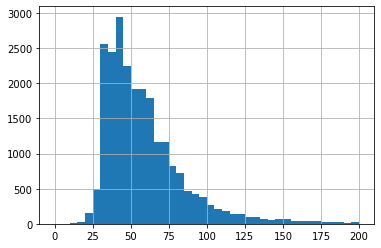

In [111]:
#Анализ общей площади помещений
print(data['total_area'].describe())
data['total_area'].hist(bins=40,range=(0,200))
#В большой площади нет ничего такого, цена за данную площадь соотведствующая

count    21700.000000
mean        34.454823
std         22.045359
min          2.000000
25%         18.600000
50%         30.000000
75%         42.299999
max        409.700012
Name: living_area, dtype: float64


<AxesSubplot:>

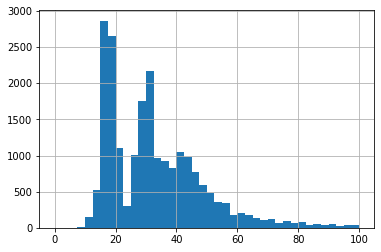

In [112]:
#Анализ жилой площади помещений
print(data['living_area'].describe())
data['living_area'].hist(bins=40,range=(0,100))
#print(data['living_area'].sort_values(ascending=False).head(10))
#В большой жилой площади нет ничего криминального, может это отель

count    21343.000000
mean        10.560994
std          5.900630
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64


<AxesSubplot:>

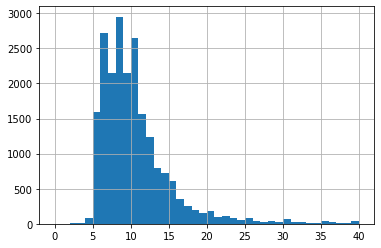

In [136]:
#Анализ площадей кухонь
print(data['kitchen_area'].describe())
data['kitchen_area'].hist(bins=40,range=(0,40))
#Кухня 100+ метров, это конечно много, но почему бы и нет?

count    2.356500e+04
mean     6.540058e+06
std      1.091093e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.646000e+06
75%      6.790000e+06
max      7.630000e+08
Name: last_price, dtype: float64


<AxesSubplot:xlabel='last_price'>

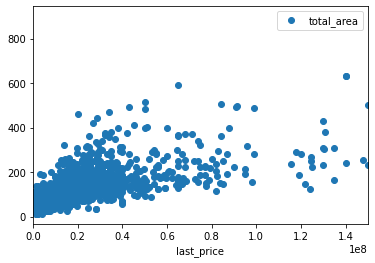

In [139]:
#Анализ цены мало чего покажет, нужно смотреть в связке с чем-то, например с метражом.
print(data['last_price'].describe())
data.plot(x='last_price',y='total_area',style ="o",xlim=(0,150000000))
#Нужно смотреть по каждому отдельному населенному пункту

count    23565.000000
mean         2.078888
std          1.066503
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64


array([[<AxesSubplot:title={'center':'rooms'}>]], dtype=object)

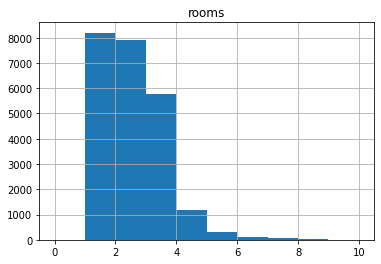

In [140]:
#Количество комнат
print(data['rooms'].describe())
data.hist('rooms', bins = 10,range=(0,10))
#Много не всегда хорошо

count    23565.000000
mean         2.697819
std          0.238002
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max         10.000000
Name: ceiling_height, dtype: float64


array([[<AxesSubplot:title={'center':'ceiling_height'}>]], dtype=object)

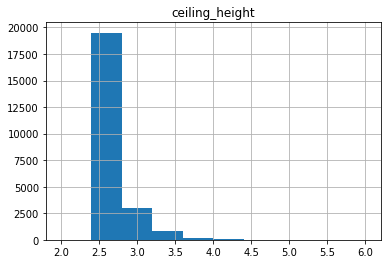

In [142]:
#Высота потолков
print(data['ceiling_height'].describe())
data.hist('ceiling_height', bins = 10,range=(2,6))
#Все значения выше 10 метров были убраны, а все пропуски были заполнены медианным значением, вот и молучаются следующие
#значения 50% 

count    23565.000000
mean         5.878124
std          4.871485
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64


array([[<AxesSubplot:title={'center':'floor'}>]], dtype=object)

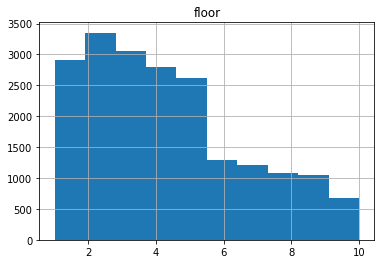

In [145]:
#Этаж квартиры
print(data['floor'].describe())
data.hist('floor', bins = 10,range=(1,10))
#Наибольшее количество квартир до 5 этажа

In [118]:
#Тип этажа квартиры
print(data["type_floor"].value_counts())
#На первом и на последнем продают меньше чем между

другой       17326
последний     3330
первый        2909
Name: type_floor, dtype: int64


count    23565.000000
mean        10.675875
std          6.594823
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64


array([[<AxesSubplot:title={'center':'floors_total'}>]], dtype=object)

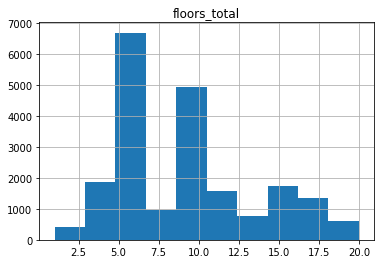

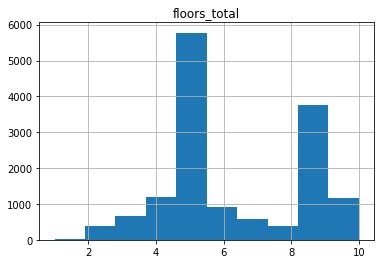

In [147]:
#Общее количество этажей в доме
print(data['floors_total'].describe())
data.hist('floors_total', bins = 10,range=(1,20))
data.hist('floors_total', bins = 10,range=(1,10))
#домов малой этажности преобладающее количество(<10)

count    18064.000000
mean     14192.656056
std       8613.348153
min        181.000000
25%       9238.000000
50%      13096.500000
75%      16285.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64


array([[<AxesSubplot:title={'center':'cityCenters_nearest'}>]],
      dtype=object)

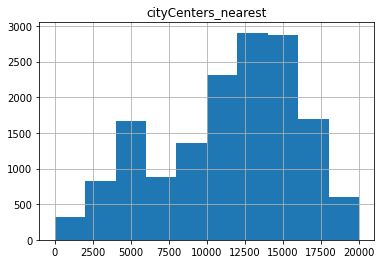

In [148]:
#Расстояние до центра города в метрах
print(data['cityCenters_nearest'].describe())
data.hist('cityCenters_nearest', bins = 10,range=(0,20000))
#В среднем 14км, максимум 70км, ну уже точно не Москва, что ставит под сомнение данное число
#print(data['locality_name'][data['cityCenters_nearest']==65968.000000]) Поселок Молодёжное в Московской области,
#но у области нет центра, спорно

count    18041.000000
mean     28797.082701
std      12632.499735
min          0.000000
25%      18565.000000
50%      26757.000000
75%      37273.000000
max      84869.000000
Name: airports_nearest, dtype: float64


array([[<AxesSubplot:title={'center':'airports_nearest'}>]], dtype=object)

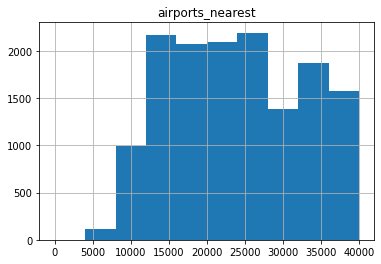

In [149]:
#Расстояние до айропорта
print(data['airports_nearest'].describe())
data.hist('airports_nearest', bins = 10,range=(0,40000))
# В среднем люди предпочитают жить подальше от айропорта

count    8030.000000
mean      490.580448
std       341.572956
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64


array([[<AxesSubplot:title={'center':'parks_nearest'}>]], dtype=object)

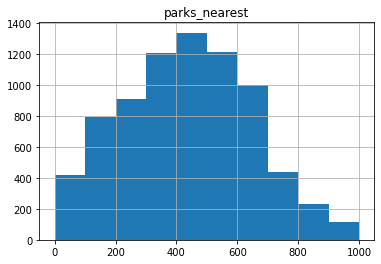

In [150]:
#Расстояние до парка
print(data['parks_nearest'].describe())
data.hist('parks_nearest', bins = 10,range=(0,1000))
#В среднем почти 500 метров, много все таки зеленых зон в городах

AxesSubplot(0.125,0.125;0.775x0.755)


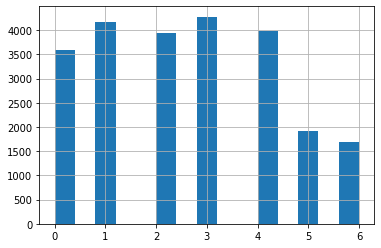

In [123]:
# День и месяц публикации обьявления
print(data['weekday'].hist(bins=15))
#Публикуют чаще в рабочие дни, может эта работа риэлторов?

AxesSubplot(0.125,0.125;0.775x0.755)


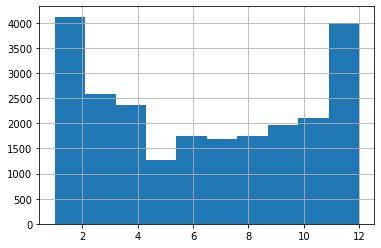

In [124]:
print(data['month'].hist())
#На начало и конец года наибольшее распределение, "год с чистого листа"?

Подвывод: <br>
Общая площадь выставленных обьектов стремиться к 40-50 м (больше всего), далее же идет на спад. <br>
По жилой площади наблюдаються 2 пика, 15-20,30-35 м, далее количество обьектов идет на спад.<br>
По площадям кухонь наблюдаеться один пик слившийся из 3х, диапазон площадей в основном от 5 до 15 м, далее идет на спад. <br>
Цены на жилье сильно разнятся, но основная масса обьявлений сконцентрированна до 10.000.000. <br>
По количеству комнат - больше всего обьявлений однакомнатных квартир, далее идет на спад. <br>
По высоте поталков больше всего обьявлений с высотой 2.8 м, далее на спад. <br>
Обьявления с квартирами на втором этаже имеют наибольшую выборку, этот вывод подчеркивает анализ типов этажей, обьявлений с типом этажей "первый" и "последний" меньше чем с типом "другой" т.е между первым и последним этажом.  <br>
Больше всего обьявлений о продаже квартир в 5ти и 9ти этажных домах <br>
В среднем квартиры продают на расстоянии от центра в 12-15 км, но есть и большая часть в 5 км. <br>
Удаленность до айропорта в среднем составляет 25-35 км. <br>
До парка удаленность в среднем 400-600 м. <br>
В основном обьявления публиковались в рабочие дни (с понедельника по пятницу). <br>
Основной пик по месяцам приходиться на январь,февраль,ноябрь и декабрь (предновогоднее и посленовогднее время).

count    20394.000000
mean       180.741395
std        219.732782
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64


array([[<AxesSubplot:title={'center':'days_exposition'}>]], dtype=object)

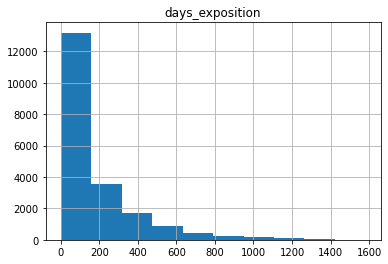

In [125]:
print(data['days_exposition'].describe())
data.hist('days_exposition', bins = 10)
#Среднее 180 дней
#Медиана 95 дней

Из получившихся данных делаем вывод, что быстрыми сделками можно назвать первые 25% т.е до 45 дней. <br>
Долгими сделками назовем последние 25% выборки, т.е более 230 дней это долгие сделки.<br>
В среднем сделка проходит за пол года - 180 дней.
Медиана составляет 95 дней.

<AxesSubplot:xlabel='last_price'>

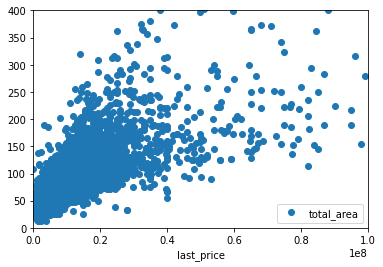

In [126]:
data.plot(x='last_price',y='total_area',style='o',xlim=(0,100000000),ylim=(0,400))
#В целом - чем больше общая площадь тем больше и цена

<AxesSubplot:xlabel='last_price'>

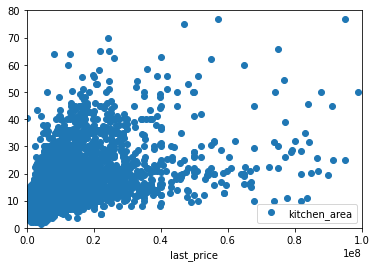

In [127]:
data.plot(x='last_price',y='kitchen_area',style='o',xlim=(0,100000000),ylim=(0,80))
#Явной с ростом площади возрастает и цена, но после 45-55 метров цена хаотична

<AxesSubplot:xlabel='last_price'>

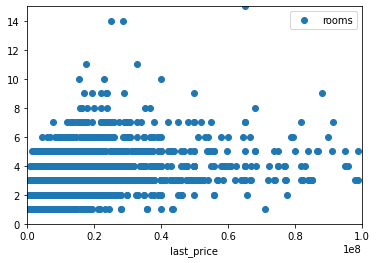

In [128]:
data.plot(x='last_price',y='rooms',style='o',xlim=(0,100000000),ylim=(0,15))
#В целом видно, что цена повышаеться к 3, а потом к 5 комнатам, а потом идет на спад.

In [177]:
print("Медианные значения цены от типа этажа обьекта")
print('Первый:',data['last_price'][data['type_floor']=="первый"].mean())
print('Другой:',data['last_price'][data['type_floor']=="другой"].mean())
print("Последний:",data['last_price'][data['type_floor']=="последний"].mean())
#print(data['last_price'][data['type_floor']=="последний"].hist(bins=1)) #Ораньжевый
#print(data['last_price'][data['type_floor']=="первый"].hist(bins=1)) #Зеленый
#На первом этаже не очень хорошая цена, на последнем же цена очень большая, может это связано с элитным жильем(пентхаусы и частные дома)
#Пытался построить .plot но не смог подобрать оптимальный запрос

Медианные значения цены от типа этажа обьекта
Первый: 4802603.99071846
Другой: 6674348.8980145445
Последний: 7359137.802102102


<b>
Самые дешевые квартиры на первом этаже, самые дорогие на последнем, скорее всего это связано с элитным жильем (пентхаусы и частные дома)

<AxesSubplot:xlabel='last_price'>

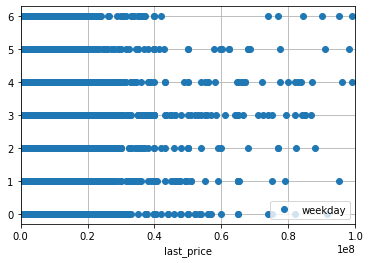

In [130]:
data.plot(x='last_price',y='weekday',style='o',grid=True,xlim=(0,100000000))
#Четверг, самый продажный день, второй на очереди понедельник 

<AxesSubplot:xlabel='last_price'>

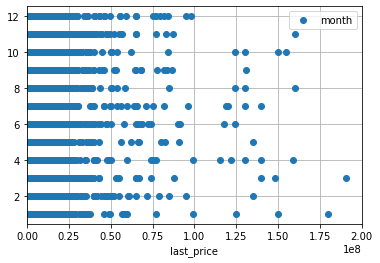

In [131]:
data.plot(x='last_price',y='month',style='o',grid=True,xlim=(0,200000000))
#Явно равномерное равномерное распределение, но видны возвышения ближе к новому году и после него, так же на середину года.

<AxesSubplot:xlabel='last_price'>

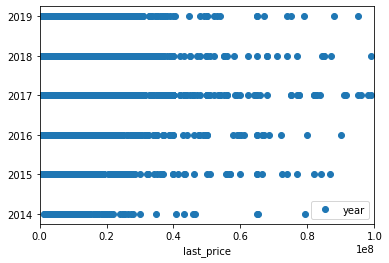

In [132]:
data.plot(x='last_price',y='year',style='o',xlim=(0,100000000))
#А вот по годам кореляция есть, самые дешевые варианты в 2014, в последующем виден рост цен до 2017 года, потом идет на понижение

Подвывод <br>
Общая площадь обьекта конечно влияет на цену почти линейно. <br>
Площадь кухни тоже влияет на цену к 45-55 цена возрастает, после она ведет себя хаотично. <br>
Количество комнат влияет на цену - к 3м комнатам цена возрастает, далее пик цены только на 5 комнатах.<br>
Квартиры на первом этаже самые низкие по цене. Самые дорогие квартиры находяться на последних этажах, возможно это связано с жильем премиум класса(пентхаусы или частные одноэтажные дома).<br>
Самый продажный день недели это четверг, следом за ним идет понедельник.<br>
Цены в течении года разняца, но самые большие сделки проходят либо перед новым годом, либо после. Следом идет июль.<br>
Наиболее характерно на цену обьекта влияет год продажи обьекта в 2014 было дешевле всего, в 2017 был пик цены, а к 2019 спад.<br> 

<AxesSubplot:ylabel='locality_name'>

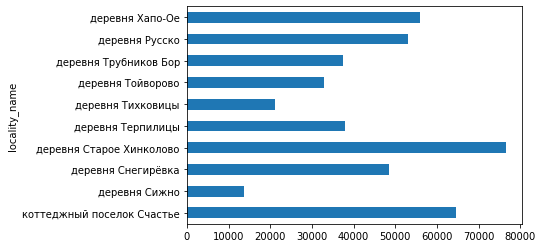

In [288]:
#Населеные пункты с самой низкой ценой за квадратный метр.
#print(data[['locality_name','price_per_m']].groupby(by='locality_name').mean().sort_values('price_per_m').head(10))
top_10_low_count = pd.pivot_table(data,index=['locality_name'],values=['price_per_m'],aggfunc=['count','mean'])
top_10_low_count.columns=['count','price_per_m']
top_10_low_count = top_10_low_count.sort_values(by='count').head(10)
top_10_low_count['price_per_m'].plot(kind='barh')

<AxesSubplot:ylabel='locality_name'>

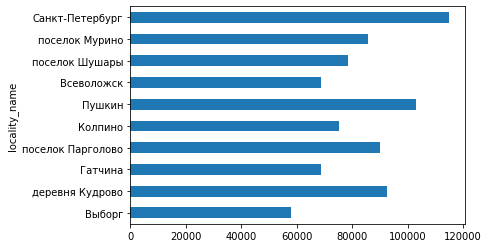

In [286]:
#Населеные пункты с самой высокой ценой за квадратный метр.
#print(data[['locality_name','price_per_m']].groupby(by='locality_name').mean().sort_values('price_per_m').tail(10))
top_10_high_count = pd.pivot_table(data,index=['locality_name'],values=['price_per_m'],aggfunc=['count','mean'])
top_10_high_count.columns=['count','price_per_m']
top_10_high_count = top_10_high_count.sort_values(by='count').tail(10)
top_10_high_count['price_per_m'].plot(kind='barh')

AxesSubplot(0.125,0.125;0.775x0.755)


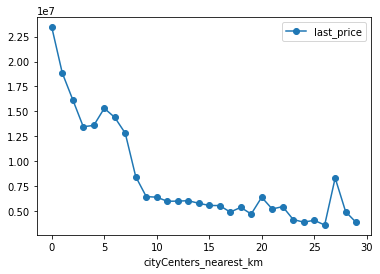

In [135]:
spb_price = data[data['locality_name']=='Санкт-Петербург']
spb_price = spb_price[spb_price['cityCenters_nearest_km'].notna()]
spb_price['cityCenters_nearest_km']=spb_price['cityCenters_nearest_km'].astype(int)
spb_price = spb_price[['last_price','cityCenters_nearest_km']]
spb_price = spb_price.groupby(by='cityCenters_nearest_km').mean()
print(spb_price.plot(style='o-'))

#Чем дальше от центра тем цена ниже.

<B>
    Центр города характеризуеться самыми высокими ценами на жилье, далее в переферии цена снижаеться с редким пиком в 26-28 км, возможно это связано с районом удаленным на данную дистанцию.

### Общий вывод

Проделана работа по подготовке данных. <br>
Были убраны пропуски,удалены шумы, в некоторых местах пропуски были закрыты медианым значением.<br>
В последующем, при сборе данных, стоило бы добавить ограничитель по высоте поталков ~ 10 м. <br>
Теперь выводы по анализу данных:<br> 
Общая площадь обьекта конечно влияет на цену почти линейно,больше всего обьектов площадью 40-50 метров. Так же наибольшее количество обьектов с площадями кухонь от 5 до 15 м. <br>
Количество комнат влияет на цену - к 3м комнатам цена возрастает, далее пик цены только на 5 комнатах.<br>
Квартиры на первом этаже самые низкие по цене. Самые дорогие квартиры находяться на последних этажах, возможно это связано с жильем премиум класса(пентхаусы или частные одноэтажные дома).<br>
В основном обьявления публиковались в будние дни.Самый "жаркий" день недели - четверг,у него больше всего опубликованных обьявлений, следом за ним идет понедельник.<br>
Цены в течении года разняца, но самые большие сделки проходят либо перед новым годом, либо после. Следом идет июль.<br>
Наиболее характерно на цену обьекта влияет год продажи обьекта в 2014 было дешевле всего, в 2017 был пик цены, а к 2019 спад.<br> 
Были составлены рейтинги населенных пунктов по цене за квадратный метр. <br> 
По зависимости цена\удаленность от центра в км по Санкт-Питербургу делаем вывод, что в центре жилье дороже, чем на перефирии  <br> 